# Machine Learning Project: Finance Predictive Analytics

# I. EDA and Preprocessing 

## Step 1.1: Loading Data and Libraries

In [1]:
# Loading essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('loan.csv')  
df.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


## Step 1.2: Initial Exploration

In [5]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (5000, 17)


In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [7]:
# Check missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)


Missing values per column:
 customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64


In [8]:
# Quick look at statistics
df.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


## Step 1.3: Will Drop Unnecesary columns

In [9]:
# Drop IDs and Date Columns
## IDs and Dates are not diractly useful


cols_to_drop = ['customer_id', 'loan_id', 'application_date', 'approval_date', 'disbursement_date', 'due_date']
df.drop(columns=cols_to_drop, inplace=True)
print("Remaining columns after dropping IDs and Dates:\n", df.columns)

Remaining columns after dropping IDs and Dates:
 Index(['loan_type', 'loan_amount', 'interest_rate', 'loan_term',
       'employment_type', 'income_level', 'credit_score', 'gender',
       'marital_status', 'education_level', 'default_status'],
      dtype='object')


## Step 1.4: Handling Missing Values

In [10]:
## in this step we will fill numerical columns with median, and categorical with mode.


# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Impute missing numerical features
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute missing categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("Any missing values left?:\n", df.isnull().sum().sum())

Any missing values left?:
 0


## Step 1.5: Encode Catigorical Variables

In [11]:

# Label Encode Categorical Features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,0,16795.0,0.051852,15.0,2,2,833.0,1,2,2,False
1,3,1860.0,0.089296,56.0,0,2,776.0,0,1,0,False
2,3,77820.0,0.070470,51.0,0,1,697.0,1,0,1,False
3,0,55886.0,0.062155,30.0,0,1,795.0,0,1,3,False
4,2,7265.0,0.070635,48.0,1,1,519.0,0,1,1,False


## Step 1.6: Feature Scaling

In [12]:
# We know that SVM IS sensitive to scale, this is why we will scale numrical features.

# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('default_status', axis=1))

# Define final X and y
X = pd.DataFrame(X_scaled, columns=df.drop('default_status', axis=1).columns)
y = df['default_status']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5000, 10)
Shape of y: (5000,)


## Step 1.7: Data Visualisation 

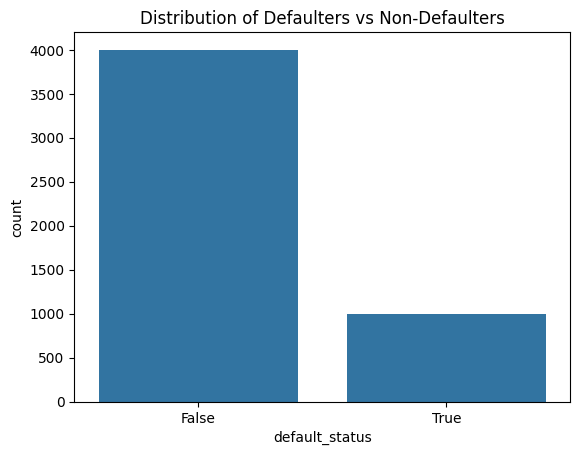

In [14]:
# Distribution of target classes
sns.countplot(x=y)
plt.title('Distribution of Defaulters vs Non-Defaulters')
plt.show()


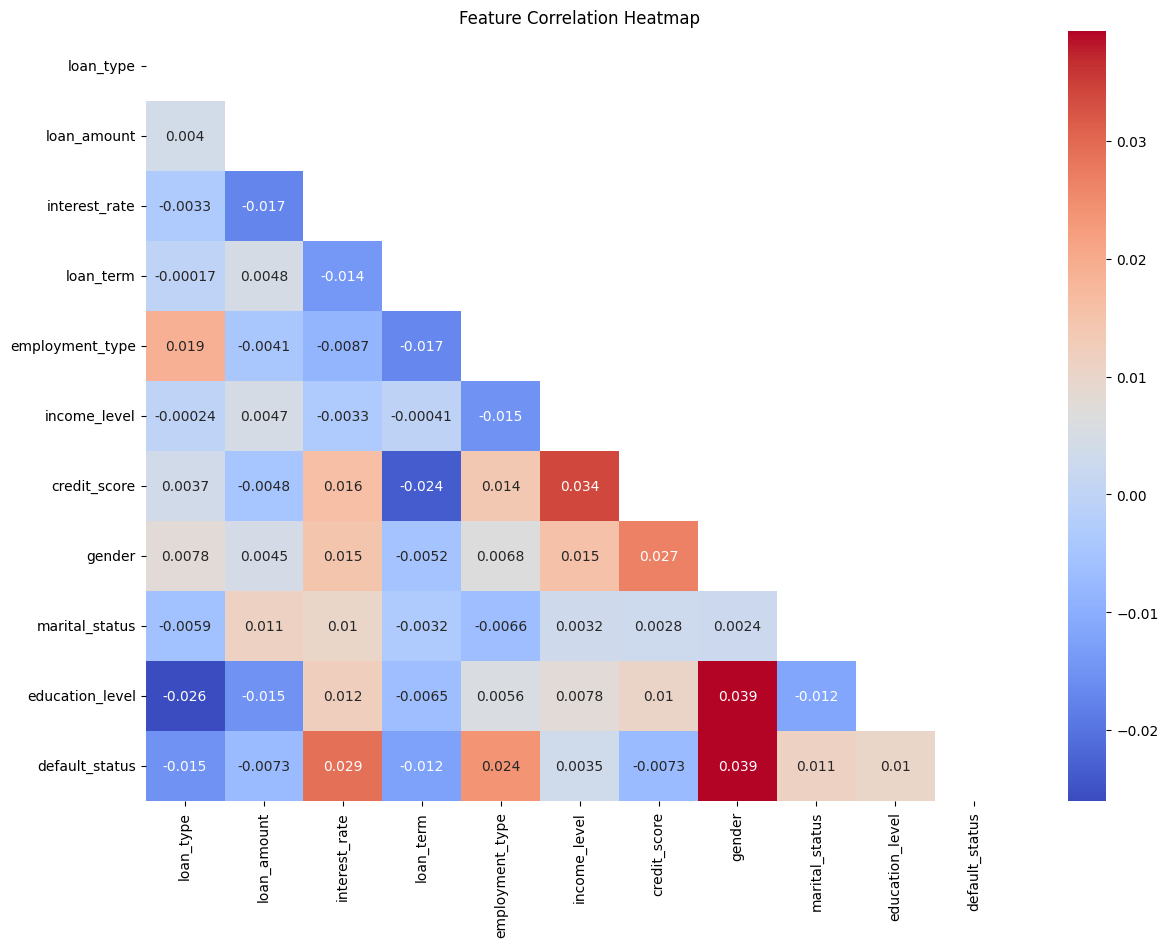

In [25]:
# Correlation heatmap
plt.figure(figsize=(14,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# EDA and Preprocessing is DONE

### Quik Recap of what we have done

1. Load and checked the data

2. Missing values handled.

3. Categorical features encoded.

4. Features scaled properly for SVM.

5. X and y are ready for modeling

# II. Model Building and Evaluation 

## Step 2.1: Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (4000, 10)
Testing Set Size: (1000, 10)


# Step 2.2: Model 1 - Logistic Regression 

### Why Logistic Regression?

1- It's a baseline model.

2- Easy to interpret.

3- Good when the data is linearly separable.

In [27]:
from sklearn.linear_model import LogisticRegression

# Build the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = log_reg.predict(X_test)

## Step 2.3: Model 2 - Random Forest Classifier

### Why Random Forest?

1- Handles non-linear relationships.

2- Reduces overfitting via ensemble of decision trees.

3- Handles categorical and numerical features well.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Build the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)

## Step 2.4: Model 3 - Support Vector Machine (SVM)

### Why SVM?

1- Very powerful in high-dimensional spaces.

2- Works well for binary classification problems.

3- Sensitive to feature scaling (which we already handled!).

In [30]:
from sklearn.svm import SVC

# Build the model
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_clf.predict(X_test)



# NOTE TO MY SELF 
# kernel='rbf': Radial Basis Function kernel (default), captures non-linear relationships.

# probability=True: Enables probability estimates needed for ROC cur

# III. Model Evaluation 

### Now we evaluate and compare all three models using:

1- Confusion Matrix

2- Classification Report (Accuracy, Precision, Recall, F1-Score)

3- ROC-AUC Score

3- ROC Curves



## Step 3.1: Define a Common Evaluation Function

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

def evaluate_model(y_test, y_pred, model_name):
    print(f"----- {model_name} -----")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

## Step 3.2: Evaluate Each Model

In [63]:
# Logistic Regression Evaluation
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Random Forest Evaluation
evaluate_model(y_test, y_pred_rf, "Random Forest")

# SVM Evaluation
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

----- Logistic Regression -----
Confusion Matrix:
[[800   0]
 [200   0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.80      1.00      0.89       800
        True       0.00      0.00      0.00       200

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000

----- Random Forest -----
Confusion Matrix:
[[800   0]
 [200   0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.80      1.00      0.89       800
        True       0.00      0.00      0.00       200

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000

----- Support Vector Machine -----
Confusion Matrix:
[[800   0]
 [200   0]]

Classification Report:
              precision    recall  f1-score   support

   

## Step 3.3: Compare ROC-AUC Scores

In [64]:
# Get probabilities for ROC Curve
y_probs_logreg = log_reg.predict_proba(X_test)[:,1]
y_probs_rf = rf_clf.predict_proba(X_test)[:,1]
y_probs_svm = svm_clf.predict_proba(X_test)[:,1]

# Calculate AUC
auc_logreg = roc_auc_score(y_test, y_probs_logreg)
auc_rf = roc_auc_score(y_test, y_probs_rf)
auc_svm = roc_auc_score(y_test, y_probs_svm)

print(f"AUC Logistic Regression: {auc_logreg:.4f}")
print(f"AUC Random Forest: {auc_rf:.4f}")
print(f"AUC SVM: {auc_svm:.4f}")

AUC Logistic Regression: 0.5014
AUC Random Forest: 0.4145
AUC SVM: 0.5417


## Step 3.4: Plot ROC Curves

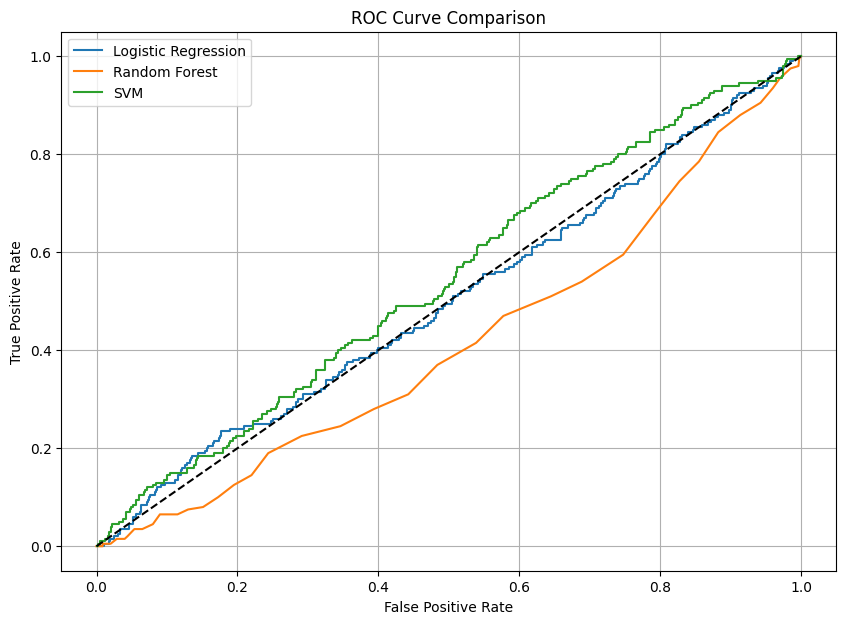

In [65]:
# ROC Curves
fpr1, tpr1, _ = roc_curve(y_test, y_probs_logreg)
fpr2, tpr2, _ = roc_curve(y_test, y_probs_rf)
fpr3, tpr3, _ = roc_curve(y_test, y_probs_svm)

plt.figure(figsize=(10,7))
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot(fpr3, tpr3, label='SVM')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

### A Quik recap of what we have in the last steps:

1. Full performance comparison across Logistic Regression, Random Forest, and SVM

2. Confusion matrices

3. Precision/Recall/F1 scores

4. ROC-AUC comparisons

5. ROC Curves plotted nicely


# IV. Feature Importance and Interpretation

## Step 4.1: Logistic Regression Interpretation

### How Logistic Regression Helps:

Each feature has a coefficient.
The sign of the coefficient (+/-) tells us if it increases or decreases the risk of default.

The magnitude shows how strongly it impacts the outcome.



### > Extract Coefficients and Ploting

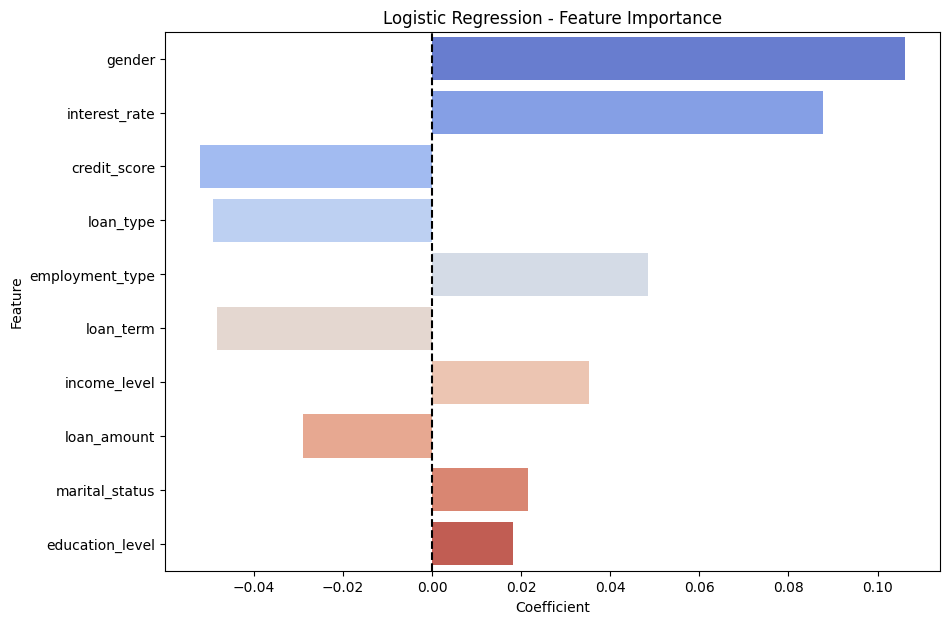

In [35]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort by absolute value of coefficients
coefficients['abs_coeff'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coeff', ascending=False)

# Plot
plt.figure(figsize=(10,7))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Logistic Regression - Feature Importance')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

### * Interpretation Example:

Positive Coefficient >> Increases chance of default.

Negative Coefficient >> Decreases chance of default.

Larger magnitude >>  Stronger impact.

### Definition to help relate 

Defaulter = Customer who does NOT repay loan (default_status = True = 1)

Non-Defaulter = Customer who repays loan (default_status = False = 0)

### Logistic Regression Chart Interpertation 

### When positive coefficient values increase (or are a particular category), the probability of default increases.

### When negative cofficient values increase, the probability of default decreases

We can say that the catagories or a particular element (gender, intrest rate and employment type) have higher probablity of default, while (income level, marital status and education level) have a moderate to low probibilty of default.

On the other hand the catagories (cridet score, loan type, loan term and loan amount) have a lower probibility of default. The higher the number the lower risk of default. 

## Step 4.2: Random Forest Interpretation

### How Random Forest Helps:

Calculates Feature Importance based on how much a feature decreases impurity in the decision trees.

Higher value >> More important for classification.

### > Extract Feature Importances and Plot

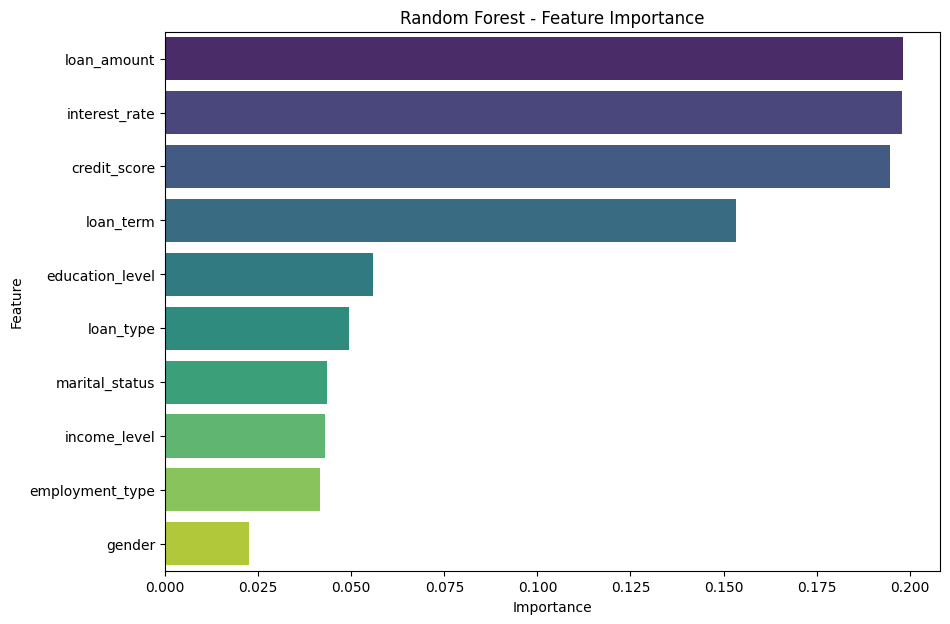

In [36]:
# Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
})

# Sort
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,7))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.show()

### *Interpretation Example:

Higher bar >> Feature is more critical in predicting default.

Random Forest is non-linear, so it captures complex patterns Logistic Regression might miss.

### Interpertation 

### We can see that we got top highest features which mean they are the most useful for making decisions about whether a customer would default or not.

## Step 4.3: SVM Interpretation

As we can't easily extract interpretable coefficients like Logistic or Random Forest.

We will be mainly use Logistic Regression and Random Forest for interpretability.

## ** We now know:
### - which features increase or decrease default risk.

### - Which features are most important overall.



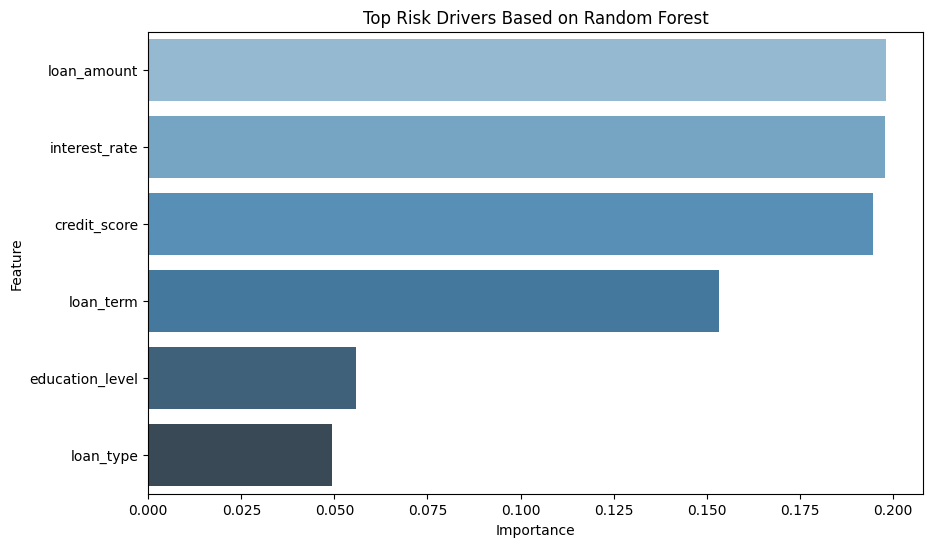

In [54]:
# Plot Key Features (Already prepared earlier from Random Forest)
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importances.head(6), x='Importance', y='Feature', palette='Blues_d')
plt.title('Top Risk Drivers Based on Random Forest')
plt.show()

# V. Summary of Business Recommendations and Insights

## 5.1 Key Findings From Models

### From Logistic Regression and Random Forest:

1. Credit Score: Strongest protective feature. Higher scores = lower default risk.

2. Interest Rate: Higher rates are associated with higher default risk.

3. Employment Type: Some employment types are riskier.

4. Loan Type: Certain loan types (likely secured ones) lower risk.

5. Loan Term: Longer loan terms slightly reduce risk.

6. Gender, Income Level, Marital Status, Education Level:

        - Minor but noticeable influences.

        - Should be considered with care (especially gender, due to ethical/legal issues).

# 5.2 Strategic Business Recommendations

1. Tighten Credit Score Cut-offs
2. Review Interest Rate Policies
3. Profile High-Risk Employment Types
4. Focus on Loan Type Differentiation
5. Use Longer Loan Terms Carefully
6. Ethical Considerations: Gender, Income, Education

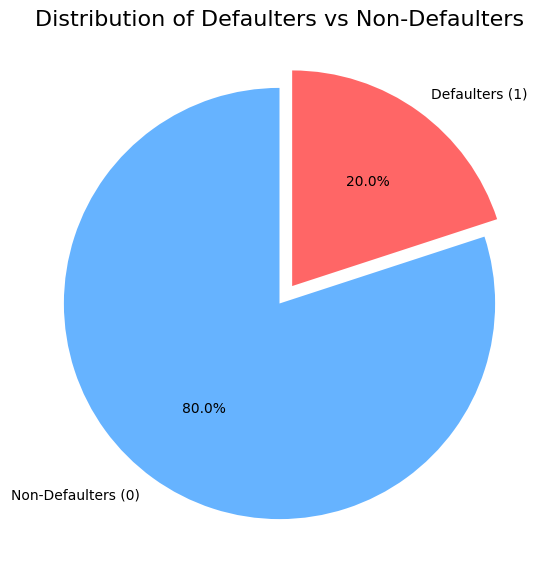

In [57]:
# Count of each class
default_counts = df['default_status'].value_counts()

# Labels
labels = ['Non-Defaulters (0)', 'Defaulters (1)']

# Colors
colors = ['#66b3ff', '#ff6666']  # Light Blue and Red

# Plot
plt.figure(figsize=(7,7))
plt.pie(
    default_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1)  # Slightly pull out the defaulters slice
)
plt.title('Distribution of Defaulters vs Non-Defaulters', fontsize=16)
plt.show()

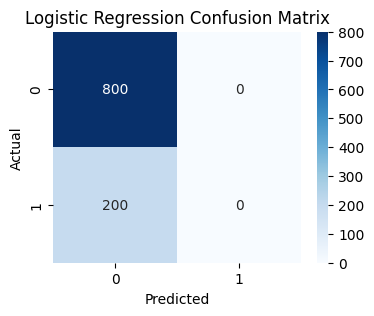

In [61]:
# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(4,3))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



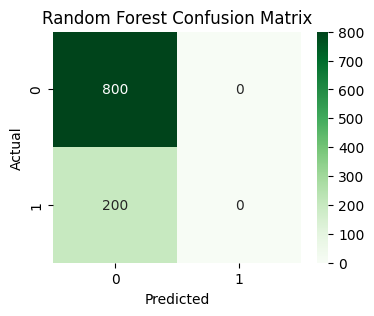

In [59]:
# Similarly for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



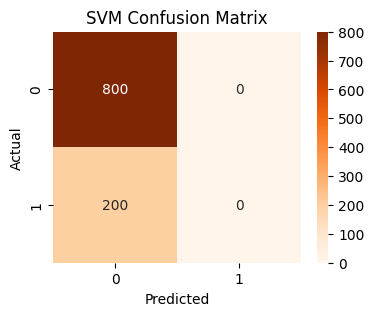

In [60]:
# Similarly for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(4,3))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()